In [1]:
import qiskit

from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
import numpy as np
import matplotlib.pyplot as plt
from uncertainties.umath import sqrt
import uncertainties
import qiskit.quantum_info as qi

In [2]:
provider=qiskit.IBMQ.load_account()

In [3]:

backend1 = provider.get_backend('ibmq_quito')
noise_model = NoiseModel.from_backend(backend1)

# Get coupling map from backend
coupling_map = backend1.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates



In [4]:
backend = qiskit.providers.aer.QasmSimulator(method='density_matrix',
                        noise_model=noise_model)
idealbackend = qiskit.providers.aer.QasmSimulator(method='density_matrix')

In [11]:
def error_simulation(probe):

# the measurment strength of probe shoulde be defined
    
    
    Err = []
    A= np.linspace(0,1,21)
    for strength in A:
        circ = qiskit.QuantumCircuit(3,2)

        circ.rx(np.pi/2,1)
        circ.ry(np.arccos(strength),0)
        circ.ry(np.arccos(probe),2)


        circ.cx(1,2)
        circ.cx(1,0)

        circ.h(1)
#        circ.measure(0,0)
#        circ.measure(2,1)
        
        circ = qiskit.compiler.transpile(circ,backend=backend1)
        circ.save_density_matrix()

        
        result = backend.run(circ)
        aresult=result.result()
        rho_H = qi.DensityMatrix(aresult.data(0)['density_matrix'])
        rho_mp = qi.partial_trace(rho_H,[1])
        rho_mp = qi.partial_trace(rho_mp,[2])
        rho_mp = qi.partial_trace(rho_mp,[2])
        #print(rho_mp)
        joint = np.real(rho_mp.to_dict()['00|00'])+np.real(rho_mp.to_dict()['11|11'])-np.real(rho_mp.to_dict()['10|10'])-np.real(rho_mp.to_dict()['01|01'])
        error = np.sqrt(2*(1-joint/probe))
        Err.append(error)
    return Err

In [12]:
def disturbance_simulation(probe):

# the measurment strength of probe shoulde be defined
    
    
    Dis = []
    A= np.linspace(0,1,21)
    for strength in A:
        circ = qiskit.QuantumCircuit(3,2)

        circ.rx(np.pi/2,1)
        circ.ry(np.arccos(strength),0)
        circ.ry(np.arccos(probe),2)

        circ.h(1)
        circ.cx(1,2)
        circ.h(1)
        circ.cx(1,0)

        circ.h(1)
#        circ.measure(1,0)
#        circ.measure(2,1)
        circ = qiskit.compiler.transpile(circ,backend=backend1)
        circ.save_density_matrix()

        
        result = backend.run(circ)
        aresult=result.result()
        rho_H = qi.DensityMatrix(aresult.data(0)['density_matrix'])
        rho_mp = qi.partial_trace(rho_H,[0])
        rho_mp = qi.partial_trace(rho_mp,[2])
        rho_mp = qi.partial_trace(rho_mp,[2])
        joint = np.real(rho_mp.to_dict()['00|00'])+np.real(rho_mp.to_dict()['11|11'])-np.real(rho_mp.to_dict()['10|10'])-np.real(rho_mp.to_dict()['01|01'])
        disturb = np.sqrt(2*(1-joint/probe))
        Dis.append(disturb)
    return Dis

In [13]:
err = error_simulation(0.105)
dis = disturbance_simulation(0.105)

In [14]:
err

[1.4139304292155,
 1.3788846680541869,
 1.3429246430564425,
 1.305974833624925,
 1.2679487115790706,
 1.2287463547569097,
 1.1882513511297896,
 1.1463267172124807,
 1.1028094176821812,
 1.0575028514674967,
 1.010166298188205,
 0.9604996715921512,
 0.9081207454199054,
 0.8525297398891031,
 0.7930514652459519,
 0.7287347224210778,
 0.6581625671484959,
 0.57905235853839,
 0.48726307377252176,
 0.37356254121046156,
 0.201017222794742]

In [32]:
def error_ibmq(probe):

# the measurment strength of probe shoulde be defined
    
    
    Err = []
    A= np.linspace(0,1,11)
    circl = []
    for strength in A:
        
        circ = qiskit.QuantumCircuit(3,2)

        circ.rx(np.pi/2,1)
        circ.ry(np.arccos(strength),0)
        circ.ry(np.arccos(probe),2)

        circ.cx(1,2)

        circ.cx(1,0)

        circ.h(1)
        circ.measure(0,0)
        circ.measure(2,1)
        
        circ = qiskit.compiler.transpile(circ,backend=backend2)
        i = 0
        while i < 5:
            
            circl.append(circ)
            i += 1

    result = backend2.run(circl,shots=20000)
    aresult=result.result()
    counts = aresult.get_counts()
        
    return counts

In [26]:
def disturbance_ibmq(probe):

# the measurment strength of probe shoulde be defined
    
    
    Err = []
    A= np.linspace(0,1,11)
    circl = []
    for strength in A:
        
        circ = qiskit.QuantumCircuit(3,2)

        circ.rx(np.pi/2,1)
        circ.ry(np.arccos(strength),0)
        circ.ry(np.arccos(probe),2)


        circ.h(1)
        circ.cx(1,2)
        circ.h(1)
        circ.cx(1,0)

        circ.h(1)
        circ.measure(1,0)
        circ.measure(2,1)
        
        circ = qiskit.compiler.transpile(circ,backend=backend2,optimization_level=3)
        i = 0
        while i < 5:
            
            circl.append(circ)
            i += 1

    result = backend2.run(circl,shots=20000)
    aresult=result.result()
    counts = aresult.get_counts()
        
    return counts

In [146]:
backend2 = provider.backend.ibmq_quito
error_ibmq(0.105)

[{'00': 5335, '01': 4867, '10': 5018, '11': 4780},
 {'00': 5248, '01': 5028, '10': 4938, '11': 4786},
 {'00': 5299, '01': 4911, '10': 5015, '11': 4775},
 {'00': 5404, '01': 4831, '10': 5027, '11': 4738},
 {'00': 5174, '01': 5050, '10': 5046, '11': 4730},
 {'00': 5382, '01': 4903, '10': 4884, '11': 4831},
 {'00': 5310, '01': 4919, '10': 4902, '11': 4869},
 {'00': 5349, '01': 4889, '10': 4984, '11': 4778},
 {'00': 5344, '01': 4883, '10': 4874, '11': 4899},
 {'00': 5267, '01': 5022, '10': 4899, '11': 4812},
 {'00': 5373, '01': 4916, '10': 4890, '11': 4821},
 {'00': 5253, '01': 4983, '10': 4831, '11': 4933},
 {'00': 5374, '01': 4907, '10': 4818, '11': 4901},
 {'00': 5362, '01': 4852, '10': 4785, '11': 5001},
 {'00': 5341, '01': 4923, '10': 4840, '11': 4896},
 {'00': 5213, '01': 5029, '10': 4847, '11': 4911},
 {'00': 5290, '01': 4984, '10': 4754, '11': 4972},
 {'00': 5301, '01': 5014, '10': 4730, '11': 4955},
 {'00': 5353, '01': 4883, '10': 4671, '11': 5093},
 {'00': 5350, '01': 4938, '10':

In [116]:
rerrcount = [{'00': 4999, '01': 4912, '10': 5092, '11': 4997},
 {'00': 5070, '01': 4929, '10': 5001, '11': 5000},
 {'00': 4957, '01': 4949, '10': 5082, '11': 5012},
 {'00': 5066, '01': 4869, '10': 5038, '11': 5027},
 {'00': 4962, '01': 4965, '10': 5107, '11': 4966},
 {'00': 5073, '01': 4982, '10': 4783, '11': 5162},
 {'00': 4961, '01': 5059, '10': 4747, '11': 5233},
 {'00': 4970, '01': 4959, '10': 4921, '11': 5150},
 {'00': 5027, '01': 5007, '10': 4731, '11': 5235},
 {'00': 5033, '01': 5043, '10': 4772, '11': 5152},
 {'00': 5017, '01': 5056, '10': 4612, '11': 5315},
 {'00': 5102, '01': 4935, '10': 4653, '11': 5310},
 {'00': 4880, '01': 5016, '10': 4781, '11': 5323},
 {'00': 5056, '01': 5020, '10': 4606, '11': 5318},
 {'00': 4964, '01': 5013, '10': 4810, '11': 5213},
 {'00': 4976, '01': 4985, '10': 4547, '11': 5492},
 {'00': 4983, '01': 4932, '10': 4437, '11': 5648},
 {'00': 4968, '01': 4964, '10': 4625, '11': 5443},
 {'00': 5047, '01': 4993, '10': 4504, '11': 5456},
 {'00': 4800, '01': 5116, '10': 4491, '11': 5593},
 {'00': 4980, '01': 4948, '10': 4366, '11': 5706},
 {'00': 4967, '01': 5087, '10': 4286, '11': 5660},
 {'00': 4983, '01': 5086, '10': 4323, '11': 5608},
 {'00': 5004, '01': 5035, '10': 4264, '11': 5697},
 {'00': 4995, '01': 4964, '10': 4434, '11': 5607},
 {'00': 5036, '01': 4976, '10': 4179, '11': 5809},
 {'00': 5042, '01': 4982, '10': 4133, '11': 5843},
 {'00': 4871, '01': 5061, '10': 4312, '11': 5756},
 {'00': 5049, '01': 4991, '10': 4118, '11': 5842},
 {'00': 5021, '01': 5016, '10': 4122, '11': 5841},
 {'00': 4882, '01': 5055, '10': 4082, '11': 5981},
 {'00': 5001, '01': 4979, '10': 4071, '11': 5949},
 {'00': 5006, '01': 4960, '10': 4111, '11': 5923},
 {'00': 4964, '01': 5023, '10': 4073, '11': 5940},
 {'00': 4947, '01': 5055, '10': 4041, '11': 5957},
 {'00': 4962, '01': 4997, '10': 3914, '11': 6127},
 {'00': 4939, '01': 5080, '10': 3906, '11': 6075},
 {'00': 5005, '01': 4993, '10': 3905, '11': 6097},
 {'00': 4928, '01': 5025, '10': 3857, '11': 6190},
 {'00': 4975, '01': 5048, '10': 3928, '11': 6049},
 {'00': 4962, '01': 4938, '10': 3684, '11': 6416},
 {'00': 5010, '01': 5018, '10': 3703, '11': 6269},
 {'00': 4955, '01': 4950, '10': 3767, '11': 6328},
 {'00': 4975, '01': 5089, '10': 3651, '11': 6285},
 {'00': 4893, '01': 5085, '10': 3765, '11': 6257},
 {'00': 4927, '01': 5004, '10': 3717, '11': 6352},
 {'00': 5017, '01': 4865, '10': 3594, '11': 6524},
 {'00': 4979, '01': 4892, '10': 3613, '11': 6516},
 {'00': 5033, '01': 4933, '10': 3689, '11': 6345},
 {'00': 4904, '01': 4962, '10': 3630, '11': 6504},
 {'00': 5014, '01': 5024, '10': 3483, '11': 6479},
 {'00': 5034, '01': 4933, '10': 3454, '11': 6579},
 {'00': 4950, '01': 5124, '10': 3519, '11': 6407},
 {'00': 4943, '01': 4890, '10': 3447, '11': 6720},
 {'00': 5000, '01': 5014, '10': 3433, '11': 6553}]

In [31]:
rerrcount = [{'00': 5335, '01': 4867, '10': 5018, '11': 4780},
 {'00': 5248, '01': 5028, '10': 4938, '11': 4786},
 {'00': 5299, '01': 4911, '10': 5015, '11': 4775},
 {'00': 5404, '01': 4831, '10': 5027, '11': 4738},
 {'00': 5174, '01': 5050, '10': 5046, '11': 4730},
 {'00': 5382, '01': 4903, '10': 4884, '11': 4831},
 {'00': 5310, '01': 4919, '10': 4902, '11': 4869},
 {'00': 5349, '01': 4889, '10': 4984, '11': 4778},
 {'00': 5344, '01': 4883, '10': 4874, '11': 4899},
 {'00': 5267, '01': 5022, '10': 4899, '11': 4812},
 {'00': 5373, '01': 4916, '10': 4890, '11': 4821},
 {'00': 5253, '01': 4983, '10': 4831, '11': 4933},
 {'00': 5374, '01': 4907, '10': 4818, '11': 4901},
 {'00': 5362, '01': 4852, '10': 4785, '11': 5001},
 {'00': 5341, '01': 4923, '10': 4840, '11': 4896},
 {'00': 5213, '01': 5029, '10': 4847, '11': 4911},
 {'00': 5290, '01': 4984, '10': 4754, '11': 4972},
 {'00': 5301, '01': 5014, '10': 4730, '11': 4955},
 {'00': 5353, '01': 4883, '10': 4671, '11': 5093},
 {'00': 5350, '01': 4938, '10': 4704, '11': 5008},
 {'00': 5397, '01': 4937, '10': 4669, '11': 4997},
 {'00': 5357, '01': 4914, '10': 4664, '11': 5065},
 {'00': 5378, '01': 4983, '10': 4620, '11': 5019},
 {'00': 5443, '01': 4900, '10': 4568, '11': 5089},
 {'00': 5298, '01': 4934, '10': 4690, '11': 5078},
 {'00': 5411, '01': 4901, '10': 4545, '11': 5143},
 {'00': 5291, '01': 5037, '10': 4620, '11': 5052},
 {'00': 5300, '01': 4923, '10': 4526, '11': 5251},
 {'00': 5344, '01': 4864, '10': 4586, '11': 5206},
 {'00': 5312, '01': 4825, '10': 4661, '11': 5202},
 {'00': 5406, '01': 4890, '10': 4530, '11': 5174},
 {'00': 5396, '01': 4889, '10': 4509, '11': 5206},
 {'00': 5313, '01': 5003, '10': 4511, '11': 5173},
 {'00': 5399, '01': 4922, '10': 4508, '11': 5171},
 {'00': 5418, '01': 4839, '10': 4513, '11': 5230},
 {'00': 5254, '01': 4934, '10': 4447, '11': 5365},
 {'00': 5327, '01': 4779, '10': 4629, '11': 5265},
 {'00': 5412, '01': 4916, '10': 4397, '11': 5275},
 {'00': 5312, '01': 4930, '10': 4347, '11': 5411},
 {'00': 5279, '01': 4930, '10': 4439, '11': 5352},
 {'00': 5437, '01': 4893, '10': 4330, '11': 5340},
 {'00': 5345, '01': 4817, '10': 4503, '11': 5335},
 {'00': 5404, '01': 4861, '10': 4395, '11': 5340},
 {'00': 5372, '01': 4787, '10': 4443, '11': 5398},
 {'00': 5334, '01': 4939, '10': 4404, '11': 5323},
 {'00': 5311, '01': 4923, '10': 4337, '11': 5429},
 {'00': 5414, '01': 4922, '10': 4274, '11': 5390},
 {'00': 5325, '01': 4871, '10': 4416, '11': 5388},
 {'00': 5444, '01': 4924, '10': 4303, '11': 5329},
 {'00': 5322, '01': 4885, '10': 4349, '11': 5444},
 {'00': 5450, '01': 4784, '10': 4316, '11': 5450},
 {'00': 5489, '01': 4724, '10': 4402, '11': 5385},
 {'00': 5556, '01': 4721, '10': 4377, '11': 5346},
 {'00': 5506, '01': 4632, '10': 4395, '11': 5467},
 {'00': 5453, '01': 4829, '10': 4402, '11': 5316}]

In [27]:
backend2 = provider.backend.ibmq_quito
disturbance_ibmq(0.105)

[{'00': 6259, '01': 4458, '10': 4504, '11': 4779},
 {'00': 6262, '01': 4432, '10': 4591, '11': 4715},
 {'00': 6058, '01': 4502, '10': 4628, '11': 4812},
 {'00': 6194, '01': 4455, '10': 4609, '11': 4742},
 {'00': 6202, '01': 4431, '10': 4595, '11': 4772},
 {'00': 6152, '01': 4386, '10': 4643, '11': 4819},
 {'00': 6127, '01': 4498, '10': 4570, '11': 4805},
 {'00': 6257, '01': 4294, '10': 4678, '11': 4771},
 {'00': 6093, '01': 4472, '10': 4673, '11': 4762},
 {'00': 6316, '01': 4481, '10': 4526, '11': 4677},
 {'00': 6129, '01': 4482, '10': 4484, '11': 4905},
 {'00': 6083, '01': 4514, '10': 4620, '11': 4783},
 {'00': 6136, '01': 4415, '10': 4628, '11': 4821},
 {'00': 6166, '01': 4476, '10': 4657, '11': 4701},
 {'00': 6139, '01': 4539, '10': 4553, '11': 4769},
 {'00': 6029, '01': 4497, '10': 4581, '11': 4893},
 {'00': 6175, '01': 4429, '10': 4600, '11': 4796},
 {'00': 6183, '01': 4488, '10': 4529, '11': 4800},
 {'00': 6119, '01': 4544, '10': 4633, '11': 4704},
 {'00': 6080, '01': 4481, '10':

In [34]:
def get_error(output):
    average=[]
    variance=[]
    deviation=[]
    pasdeviation=[]
    temp= np.linspace(0,10,11)
    for i in temp:
        i = int(i)
        positive = (output[i*5]['00']+output[i*5]['11']+
                    output[i*5+1]['00']+output[i*5+1]['11']+
                    output[i*5+2]['00']+output[i*5+2]['11']+
                    output[i*5+3]['00']+output[i*5+3]['11']+
                    output[i*5+4]['00']+output[i*5+4]['11'])

        negetive = (output[i*5]['01']+output[i*5]['10']+
                    output[i*5+1]['01']+output[i*5+1]['10']+
                    output[i*5+2]['01']+output[i*5+2]['10']+
                    output[i*5+3]['01']+output[i*5+3]['10']+
                    output[i*5+4]['01']+output[i*5+4]['10'])
        
        average.append((positive-negetive)/100000)
        variance.append(1/99999*(positive*(1-average[i])**2+negetive*(1+average[i])**2)/100000)
        deviation.append(uncertainties.ufloat(average[i], 2*np.sqrt(variance[i])))
        print(average[i]/0.105)
        pasdeviation.append(sqrt(2*(1-deviation[i]/0.105)))
    return pasdeviation

In [35]:
Rerr = get_error(rerrcount)

0.05123809523809524
0.16019047619047622
0.23904761904761906
0.27542857142857147
0.404
0.4784761904761905
0.5497142857142857
0.6194285714285714
0.691047619047619
0.723047619047619
0.8415238095238095


In [10]:
rdiscount = [{'00': 5679, '01': 4986, '10': 4529, '11': 4806},
 {'00': 5609, '01': 4954, '10': 4563, '11': 4874},
 {'00': 5547, '01': 4998, '10': 4686, '11': 4769},
 {'00': 5600, '01': 5055, '10': 4429, '11': 4916},
 {'00': 5773, '01': 5055, '10': 4457, '11': 4715},
 {'00': 5638, '01': 4907, '10': 4655, '11': 4800},
 {'00': 5686, '01': 4980, '10': 4477, '11': 4857},
 {'00': 5654, '01': 5129, '10': 4488, '11': 4729},
 {'00': 5729, '01': 5004, '10': 4536, '11': 4731},
 {'00': 5702, '01': 5008, '10': 4464, '11': 4826},
 {'00': 5663, '01': 4896, '10': 4552, '11': 4889},
 {'00': 5716, '01': 5039, '10': 4475, '11': 4770},
 {'00': 5652, '01': 4990, '10': 4561, '11': 4797},
 {'00': 5705, '01': 4981, '10': 4477, '11': 4837},
 {'00': 5569, '01': 5027, '10': 4623, '11': 4781},
 {'00': 5668, '01': 5064, '10': 4512, '11': 4756},
 {'00': 5636, '01': 5002, '10': 4511, '11': 4851},
 {'00': 5738, '01': 5057, '10': 4446, '11': 4759},
 {'00': 5639, '01': 5086, '10': 4453, '11': 4822},
 {'00': 5720, '01': 4914, '10': 4590, '11': 4776},
 {'00': 5671, '01': 5006, '10': 4453, '11': 4870},
 {'00': 5600, '01': 5032, '10': 4568, '11': 4800},
 {'00': 5655, '01': 5088, '10': 4415, '11': 4842},
 {'00': 5649, '01': 4956, '10': 4643, '11': 4752},
 {'00': 5640, '01': 4961, '10': 4588, '11': 4811},
 {'00': 5697, '01': 4933, '10': 4568, '11': 4802},
 {'00': 5728, '01': 5047, '10': 4538, '11': 4687},
 {'00': 5710, '01': 4960, '10': 4697, '11': 4633},
 {'00': 5768, '01': 4929, '10': 4518, '11': 4785},
 {'00': 5641, '01': 5044, '10': 4644, '11': 4671},
 {'00': 5634, '01': 5099, '10': 4510, '11': 4757},
 {'00': 5583, '01': 5034, '10': 4634, '11': 4749},
 {'00': 5650, '01': 5068, '10': 4605, '11': 4677},
 {'00': 5633, '01': 5000, '10': 4535, '11': 4832},
 {'00': 5648, '01': 4985, '10': 4655, '11': 4712},
 {'00': 5632, '01': 5094, '10': 4509, '11': 4765},
 {'00': 5544, '01': 5028, '10': 4741, '11': 4687},
 {'00': 5749, '01': 4980, '10': 4597, '11': 4674},
 {'00': 5568, '01': 5074, '10': 4579, '11': 4779},
 {'00': 5636, '01': 5079, '10': 4573, '11': 4712},
 {'00': 5610, '01': 5124, '10': 4641, '11': 4625},
 {'00': 5712, '01': 5116, '10': 4552, '11': 4620},
 {'00': 5511, '01': 5040, '10': 4734, '11': 4715},
 {'00': 5687, '01': 4973, '10': 4679, '11': 4661},
 {'00': 5702, '01': 4982, '10': 4726, '11': 4590},
 {'00': 5633, '01': 4992, '10': 4821, '11': 4554},
 {'00': 5551, '01': 5056, '10': 4732, '11': 4661},
 {'00': 5613, '01': 5090, '10': 4723, '11': 4574},
 {'00': 5679, '01': 5048, '10': 4714, '11': 4559},
 {'00': 5512, '01': 5095, '10': 4626, '11': 4767},
 {'00': 5453, '01': 5233, '10': 4796, '11': 4518},
 {'00': 5518, '01': 5106, '10': 4774, '11': 4602},
 {'00': 5518, '01': 5153, '10': 4845, '11': 4484},
 {'00': 5418, '01': 5174, '10': 4929, '11': 4479},
 {'00': 5397, '01': 5260, '10': 4752, '11': 4591}]

In [24]:
rdiscount = [{'00': 5610, '01': 4993, '10': 4453, '11': 4944},
 {'00': 5546, '01': 4992, '10': 4536, '11': 4926},
 {'00': 5760, '01': 4951, '10': 4454, '11': 4835},
 {'00': 5634, '01': 5026, '10': 4463, '11': 4877},
 {'00': 5563, '01': 4961, '10': 4581, '11': 4895},
 {'00': 5640, '01': 4935, '10': 4488, '11': 4937},
 {'00': 5579, '01': 4957, '10': 4618, '11': 4846},
 {'00': 5557, '01': 4990, '10': 4521, '11': 4932},
 {'00': 5618, '01': 4994, '10': 4486, '11': 4902},
 {'00': 5669, '01': 4910, '10': 4490, '11': 4931},
 {'00': 5609, '01': 4963, '10': 4599, '11': 4829},
 {'00': 5812, '01': 4973, '10': 4429, '11': 4786},
 {'00': 5686, '01': 5045, '10': 4465, '11': 4804},
 {'00': 5699, '01': 4918, '10': 4562, '11': 4821},
 {'00': 5677, '01': 5024, '10': 4489, '11': 4810},
 {'00': 5627, '01': 5026, '10': 4565, '11': 4782},
 {'00': 5677, '01': 4987, '10': 4568, '11': 4768},
 {'00': 5616, '01': 4936, '10': 4601, '11': 4847},
 {'00': 5552, '01': 5049, '10': 4482, '11': 4917},
 {'00': 5538, '01': 5024, '10': 4603, '11': 4835},
 {'00': 5726, '01': 4960, '10': 4529, '11': 4785},
 {'00': 5572, '01': 5037, '10': 4587, '11': 4804},
 {'00': 5652, '01': 5016, '10': 4489, '11': 4843},
 {'00': 5629, '01': 4983, '10': 4513, '11': 4875},
 {'00': 5624, '01': 4969, '10': 4633, '11': 4774},
 {'00': 5622, '01': 5193, '10': 4464, '11': 4721},
 {'00': 5631, '01': 5004, '10': 4571, '11': 4794},
 {'00': 5613, '01': 4940, '10': 4538, '11': 4909},
 {'00': 5610, '01': 5036, '10': 4450, '11': 4904},
 {'00': 5642, '01': 4924, '10': 4648, '11': 4786},
 {'00': 5652, '01': 4981, '10': 4687, '11': 4680},
 {'00': 5544, '01': 4985, '10': 4611, '11': 4860},
 {'00': 5590, '01': 5029, '10': 4558, '11': 4823},
 {'00': 5640, '01': 5064, '10': 4494, '11': 4802},
 {'00': 5689, '01': 5035, '10': 4618, '11': 4658},
 {'00': 5581, '01': 5059, '10': 4645, '11': 4715},
 {'00': 5609, '01': 4998, '10': 4689, '11': 4704},
 {'00': 5581, '01': 5061, '10': 4619, '11': 4739},
 {'00': 5555, '01': 5091, '10': 4677, '11': 4677},
 {'00': 5616, '01': 4959, '10': 4567, '11': 4858},
 {'00': 5592, '01': 5134, '10': 4613, '11': 4661},
 {'00': 5640, '01': 5039, '10': 4625, '11': 4696},
 {'00': 5526, '01': 4988, '10': 4790, '11': 4696},
 {'00': 5518, '01': 5077, '10': 4628, '11': 4777},
 {'00': 5630, '01': 5077, '10': 4630, '11': 4663},
 {'00': 5538, '01': 4983, '10': 4711, '11': 4768},
 {'00': 5383, '01': 5147, '10': 4768, '11': 4702},
 {'00': 5572, '01': 5022, '10': 4785, '11': 4621},
 {'00': 5562, '01': 5097, '10': 4687, '11': 4654},
 {'00': 5511, '01': 5131, '10': 4747, '11': 4611},
 {'00': 5429, '01': 5191, '10': 4900, '11': 4480},
 {'00': 5460, '01': 5206, '10': 4880, '11': 4454},
 {'00': 5477, '01': 5207, '10': 4842, '11': 4474},
 {'00': 5415, '01': 5224, '10': 4822, '11': 4539},
 {'00': 5350, '01': 5340, '10': 4870, '11': 4440}]

In [28]:
rdiscount = [{'00': 6259, '01': 4458, '10': 4504, '11': 4779},
 {'00': 6262, '01': 4432, '10': 4591, '11': 4715},
 {'00': 6058, '01': 4502, '10': 4628, '11': 4812},
 {'00': 6194, '01': 4455, '10': 4609, '11': 4742},
 {'00': 6202, '01': 4431, '10': 4595, '11': 4772},
 {'00': 6152, '01': 4386, '10': 4643, '11': 4819},
 {'00': 6127, '01': 4498, '10': 4570, '11': 4805},
 {'00': 6257, '01': 4294, '10': 4678, '11': 4771},
 {'00': 6093, '01': 4472, '10': 4673, '11': 4762},
 {'00': 6316, '01': 4481, '10': 4526, '11': 4677},
 {'00': 6129, '01': 4482, '10': 4484, '11': 4905},
 {'00': 6083, '01': 4514, '10': 4620, '11': 4783},
 {'00': 6136, '01': 4415, '10': 4628, '11': 4821},
 {'00': 6166, '01': 4476, '10': 4657, '11': 4701},
 {'00': 6139, '01': 4539, '10': 4553, '11': 4769},
 {'00': 6029, '01': 4497, '10': 4581, '11': 4893},
 {'00': 6175, '01': 4429, '10': 4600, '11': 4796},
 {'00': 6183, '01': 4488, '10': 4529, '11': 4800},
 {'00': 6119, '01': 4544, '10': 4633, '11': 4704},
 {'00': 6080, '01': 4481, '10': 4617, '11': 4822},
 {'00': 6169, '01': 4410, '10': 4654, '11': 4767},
 {'00': 6089, '01': 4453, '10': 4502, '11': 4956},
 {'00': 6115, '01': 4555, '10': 4585, '11': 4745},
 {'00': 6049, '01': 4560, '10': 4589, '11': 4802},
 {'00': 6145, '01': 4523, '10': 4601, '11': 4731},
 {'00': 5968, '01': 4580, '10': 4656, '11': 4796},
 {'00': 6073, '01': 4590, '10': 4531, '11': 4806},
 {'00': 6043, '01': 4569, '10': 4583, '11': 4805},
 {'00': 6113, '01': 4475, '10': 4653, '11': 4759},
 {'00': 6027, '01': 4730, '10': 4536, '11': 4707},
 {'00': 5898, '01': 4668, '10': 4641, '11': 4793},
 {'00': 5976, '01': 4565, '10': 4691, '11': 4768},
 {'00': 5982, '01': 4543, '10': 4614, '11': 4861},
 {'00': 5871, '01': 4678, '10': 4631, '11': 4820},
 {'00': 6044, '01': 4550, '10': 4583, '11': 4823},
 {'00': 5885, '01': 4751, '10': 4560, '11': 4804},
 {'00': 5977, '01': 4710, '10': 4641, '11': 4672},
 {'00': 5845, '01': 4647, '10': 4703, '11': 4805},
 {'00': 5861, '01': 4752, '10': 4563, '11': 4824},
 {'00': 5966, '01': 4737, '10': 4569, '11': 4728},
 {'00': 6016, '01': 4709, '10': 4618, '11': 4657},
 {'00': 5861, '01': 4788, '10': 4703, '11': 4648},
 {'00': 5818, '01': 4829, '10': 4650, '11': 4703},
 {'00': 5779, '01': 4873, '10': 4579, '11': 4769},
 {'00': 5820, '01': 4771, '10': 4714, '11': 4695},
 {'00': 5727, '01': 4908, '10': 4711, '11': 4654},
 {'00': 5773, '01': 4954, '10': 4646, '11': 4627},
 {'00': 5745, '01': 4949, '10': 4693, '11': 4613},
 {'00': 5721, '01': 4914, '10': 4687, '11': 4678},
 {'00': 5688, '01': 4886, '10': 4675, '11': 4751},
 {'00': 5475, '01': 5238, '10': 4852, '11': 4435},
 {'00': 5522, '01': 5189, '10': 4835, '11': 4454},
 {'00': 5455, '01': 5224, '10': 4792, '11': 4529},
 {'00': 5527, '01': 5157, '10': 4789, '11': 4527},
 {'00': 5464, '01': 5217, '10': 4781, '11': 4538}]

In [17]:
def get_disturbance(output):
    average=[]
    variance=[]
    deviation=[]
    pasdeviation=[]
    temp= np.linspace(0,10,11)
    for i in temp:
        i = int(i)
        positive = (output[i*5]['00']+output[i*5]['11']+
                    output[i*5+1]['00']+output[i*5+1]['11']+
                    output[i*5+2]['00']+output[i*5+2]['11']+
                    output[i*5+3]['00']+output[i*5+3]['11']+
                    output[i*5+4]['00']+output[i*5+4]['11'])

        negetive = (output[i*5]['01']+output[i*5]['10']+
                    output[i*5+1]['01']+output[i*5+1]['10']+
                    output[i*5+2]['01']+output[i*5+2]['10']+
                    output[i*5+3]['01']+output[i*5+3]['10']+
                    output[i*5+4]['01']+output[i*5+4]['10'])
        
        average.append((positive-negetive)/100000)
        variance.append(1/99999*(positive*(1-average[i])**2+negetive*(1+average[i])**2)/100000)
        deviation.append(uncertainties.ufloat(average[i], 2*np.sqrt(variance[i])))
        print(average[i]/0.105)
        pasdeviation.append(sqrt(2*(1-deviation[i]/0.105)))
    return pasdeviation

In [29]:
Rdis = get_disturbance(rdiscount)

0.9133333333333333
0.9102857142857143
0.8822857142857143
0.8763809523809525
0.8700952380952381
0.7803809523809524
0.7306666666666667
0.6413333333333333
0.5268571428571429
0.37657142857142856
-0.014095238095238095


In [14]:
probe = 0.105

1.2165525060596438+/-0.03499725877775135

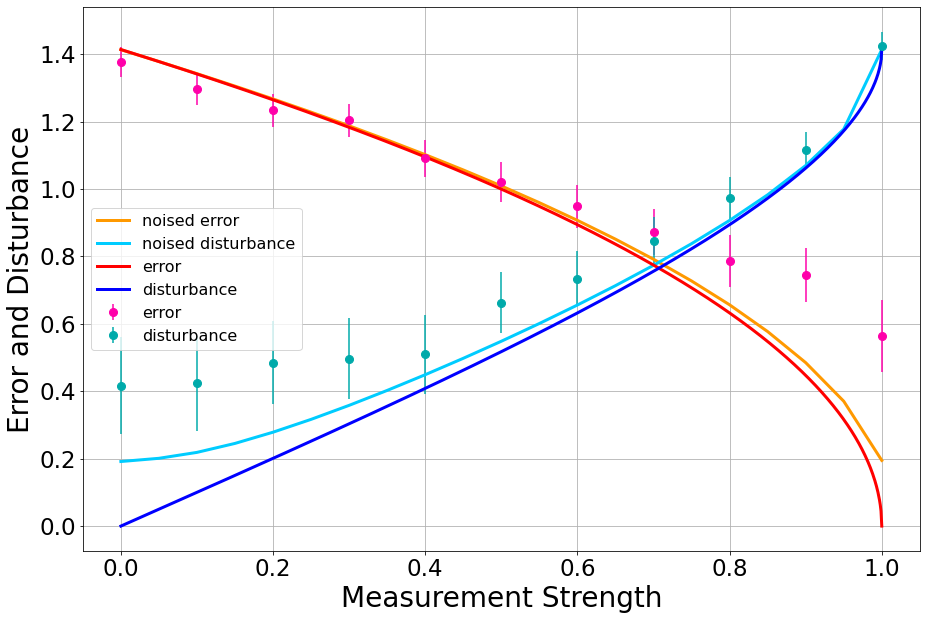

In [51]:
E=np.linspace(0,1,1001)
plt.figure(figsize=(15,10))
A= np.linspace(0,1,21)
B = np.linspace(0,10,11)
Errv=[]
Errer=[]
Disv=[]
Diser=[]
for i in B:
    i = int(i)
    Errv.append(Rerr[i].nominal_value)
    Errer.append(Rerr[i].std_dev)
    Disv.append(Rdis[i].nominal_value)
    Diser.append(Rdis[i].std_dev)

plt.plot(A,err,color='#ff9900',lw=3,label='noised error')
plt.plot(A,dis,color='#00ccff',lw=3,label='noised disturbance')
plt.errorbar(B/10,Errv,yerr=Errer,ms=8,ecolor="#ff00aa",fmt="o",mfc="#ff00aa",mec="#ff00aa",label='error')
plt.errorbar(B/10,Disv,yerr=Diser,ms=8,ecolor="#00aaaa",fmt="o",mfc="#00aaaa",mec="#00aaaa",label='disturbance')
plt.plot(E,np.sqrt(2*(1-E)),color='#ff0000',lw=3,label='error')
plt.plot(E,np.sqrt(2*(1-np.sin(np.arccos(E)))),color='#0000ff',lw=3,label='disturbance')
#plt.plot(E,np.sqrt(2*(1-E))*np.sqrt(2*(1-np.sin(np.arccos(E))))+np.sqrt(2*(1-np.sin(np.arccos(E))))+np.sqrt(2*(1-E)),color='#ff0000',lw=2)
plt.legend(loc=0,fontsize=16)
plt.xlabel("Measurement Strength",size=28)
plt.ylabel("Error and Disturbance",size=28)
plt.tick_params(labelsize=23)
plt.grid(True)

In [88]:
1.216+0.11-err[21]

-0.012601994426875818

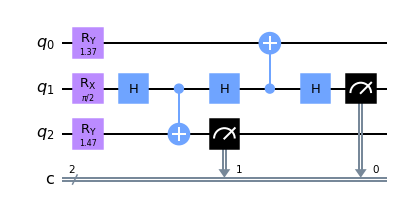

In [22]:
        circ = qiskit.QuantumCircuit(3,2)

        circ.rx(np.pi/2,1)
        circ.ry(np.arccos(0.2),0)
        circ.ry(np.arccos(probe),2)


        circ.h(1)
        circ.cx(1,2)
        circ.h(1)
        circ.cx(1,0)

        circ.h(1)
        circ.measure(1,0)
        circ.measure(2,1)
        circ.draw("mpl")